In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 16})

# Prova d'esame - Corso di Probabilità & Statistica
## Inserimento lavorativo dottori di ricerca (ISTAT, 2018)
###### Alessandro Proserpio - Anno Accademico 2020-2021

Sono forniti i dati per un campione di 16057 dottori di ricerca, sui 22098 totali, che hanno conseguito il titolo in Italia negli anni 2012 e 2014. Ci proponiamo di condurre un'analisi dei dati sull'occupazione dei dottori di ricerca intervistati al momento della compilazione del sondaggio evidenziando settore di impiego, alla mobilità internazionale a al reddito. Particolare attenzione verrà posta alle disuguaglianze di genere e alle differenze fra i diversi ambiti di svolgimento del dottorato.

In [2]:
df_phd = pd.read_csv("INSPROFDOTTRIC_Microdati_2018.txt", sep="\t")
for c in df_phd.columns:
    df_phd.loc[:, c] = pd.to_numeric(df_phd.loc[:, c], errors="coerce")
for c in df_phd.columns:
    df_phd[c] = pd.to_numeric(df_phd[c])
df_phd.sample(10)

,progr_dott,eta_dott,sesso,cittadinanza,citt_ita,anno_dott,mese_dott,ateneo_reg,ateneo_rip,cod_area_w,...,dipaut_p,aut_p,dip_p,titstu_m,titstugen,cond_m,dipaut_m,aut_m,dip_m,coeff
5043,6812,2,2,100,1,2014,1,3.0,1.0,11,...,2.0,3.0,NaN,3,3,3,NaN,NaN,NaN,1.245346
13934,19186,3,2,101,0,2012,4,12.0,3.0,10,...,2.0,2.0,NaN,4,5,1,2.0,1.0,NaN,2.609980
5738,7759,3,2,100,1,2012,1,15.0,4.0,12,...,1.0,NaN,3.0,1,2,4,1.0,NaN,5.0,1.444538
14944,20669,3,2,100,1,2012,2,6.0,2.0,10,...,2.0,2.0,NaN,3,5,1,2.0,2.0,NaN,1.333745
9609,13301,3,1,100,1,2014,2,8.0,2.0,6,...,2.0,2.0,NaN,5,5,4,1.0,NaN,2.0,1.191331
6536,9003,3,2,301,0,2014,2,9.0,3.0,10,...,NaN,NaN,NaN,4,5,4,1.0,NaN,2.0,1.811110
9192,12752,2,1,100,1,2014,2,9.0,3.0,10,...,1.0,NaN,2.0,5,5,1,1.0,NaN,2.0,1.297624
2523,3404,3,2,100,1,2014,1,5.0,2.0,8,...,1.0,NaN,2.0,3,3,1,1.0,NaN,2.0,1.329115
3578,4859,3,2,100,1,2014,2,15.0,4.0,6,...,2.0,2.0,NaN,5,5,1,1.0,NaN,1.0,1.310420
7368,10136,4,1,100,1,2014,2,20.0,5.0,5,...,NaN,NaN,NaN,6,6,6,NaN,NaN,NaN,1.332080


In [3]:
df_phd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Columns: 204 entries, progr_dott to coeff
dtypes: float64(136), int64(68)
memory usage: 25.0 MB


La presenza di molte entrate vuote (riempite con <code>Nan</code>) nel dataframe non rappresenta un problema particolarmente importante dal punto di vista "concettuale" né è un difetto nella raccolta dei dati (è più un problema di presentazione degli stessi): molte risposte all'interno del sondaggio sono mutualmente esclusive, ad esempio un dottore che non ha svolto periodi di formazione all'estero non risponderà alle domande riguardanti la durata di tale periodo ecc (e, dunque, tali voci resteranno vuote).

## Overview

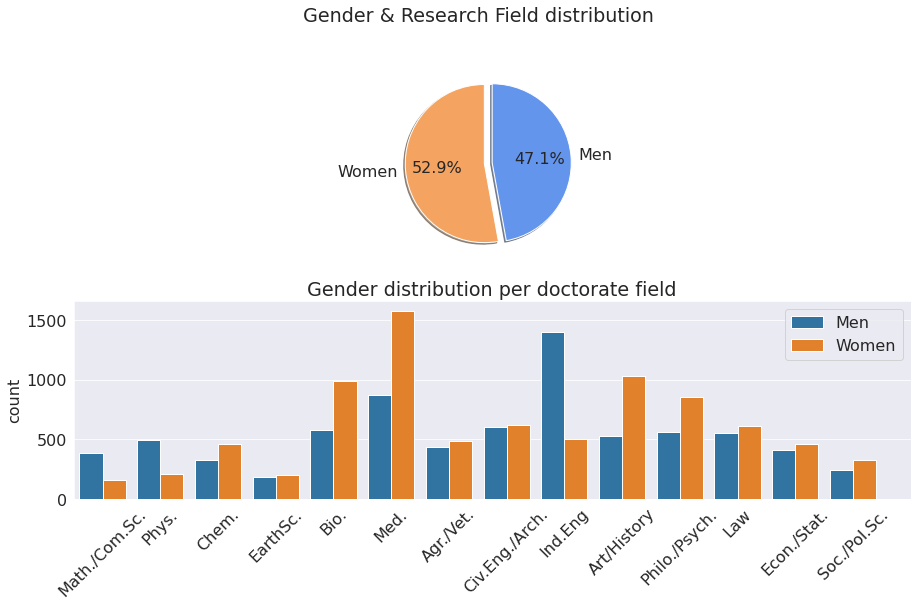

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(15,8))
fig.suptitle("Gender & Research Field distribution")
sns.countplot(ax=axes[1], data=df_phd, x="cod_area_w", hue="sesso", palette = "tab10")
axes[1].set_title("Gender distribution per doctorate field")
axes[1].set_xlabel("")
axes[1].legend(title="", labels=["Men", "Women"])
axes[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
axes[1].set_xticklabels(["Math./Com.Sc.", "Phys.", "Chem.", "EarthSc.", "Bio.", "Med.", "Agr./Vet.", 
                         "Civ.Eng./Arch.", "Ind.Eng", "Art/History", "Philo./Psych.", "Law", "Econ./Stat.", 
                         "Soc./Pol.Sc.",""], rotation=45)
axes[0].pie(x=df_phd.sesso.value_counts(), labels = ["Women", "Men"], 
            autopct = "%1.1f%%", shadow=True, explode=[0.1,0], startangle=90, 
            colors=["sandybrown", "cornflowerblue"]);

- Il campione presenta una lieve prevalenza di donne. 
- In particolare, esse rappresentano la maggioranza dei dottorandi in tutte le discipline HASS (Scienze Storiche e Artistiche, Filosofia e Psicologia, Scienze Giuridiche e Scienze Sociali e Politiche).
- Nelle STEM vi è un equilibrio maggiore con una forte asimmetria maschile nei dottorandi di Matematica e Informatica, Fisica e Ingegneria e femminile in quelli di Biologia e Scienze Mediche.

In [5]:
doc_field = {1: "Eng./Tech.",      2: "Nat.Sc.",      3: "Nat.Sc.",      4: "Nat.Sc.",      5: "Nat.Sc.",
             6: "Med.",            7: "Nat.Sc.",      8: "Eng./Tech.",   9 : "Eng./Tech.",  10: "Humanities",
             11: "Humanities",     12: "Humanities",  13: "Soc.Sc.",     14: "Soc.Sc.",     15: ""}
df_phd["settdott"] = df_phd["cod_area_w"].map(doc_field)

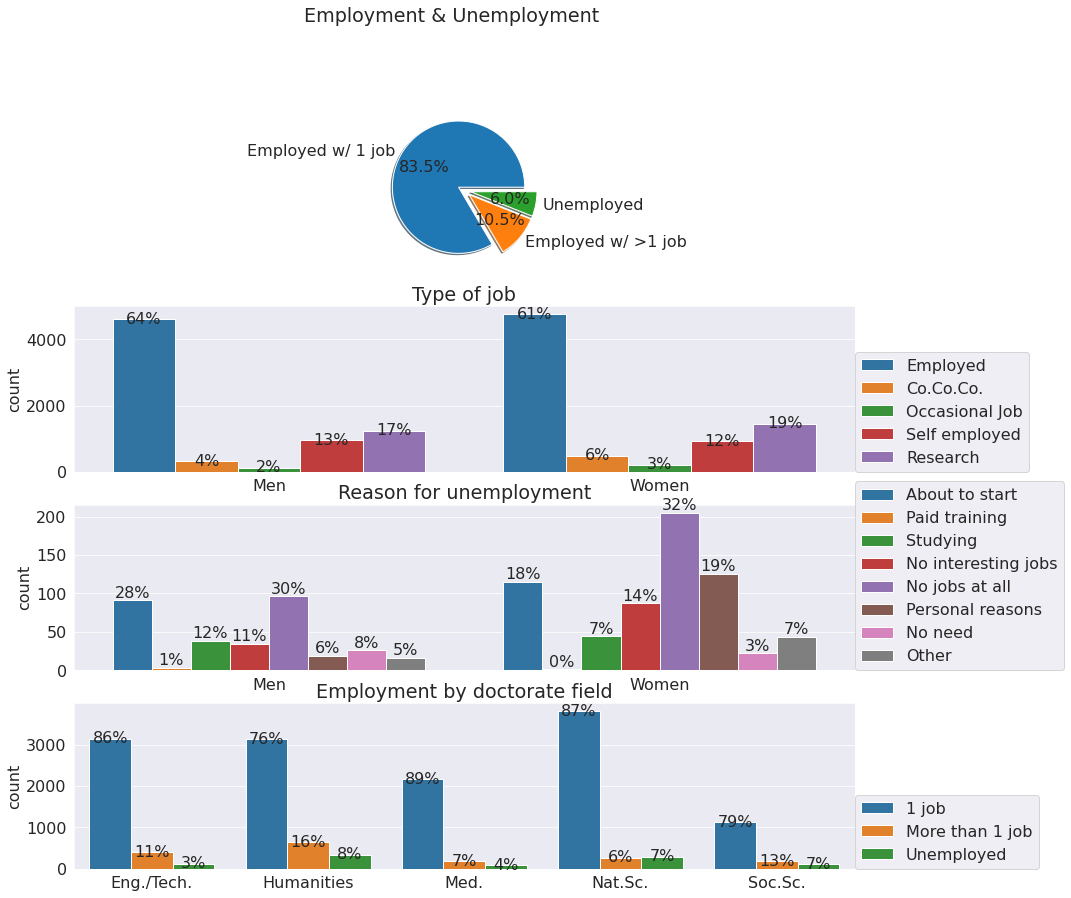

In [6]:
df_phd_employed = df_phd[df_phd.lavora != 3]
df_phd_unemployed = df_phd[df_phd.lavora == 3]
r=4
c=1
fig, axes = plt.subplots(r, c, figsize=(14,14))
fig.suptitle("Employment & Unemployment")
axes[0].pie(x=df_phd.lavora.value_counts(), autopct = "%1.1f%%", shadow=True,  labels=["Employed w/ 1 job", 
                                                                                       "Employed w/ >1 job", 
                                                                                       "Unemployed"],
            explode=[0.1,0.1,0.1])

df_phd_employed.sort_values(["sesso", "tipo_lav_princ"])
tipolav_freq = df_phd_employed.groupby(["sesso", "tipo_lav_princ"]).size().reset_index().rename(columns={0: "count"})
tipolav_freq["percentage"] = tipolav_freq.groupby("sesso").apply(lambda x: x["count"]/x["count"].sum()).values
tipolav_freq = tipolav_freq.sort_values(["tipo_lav_princ", "sesso"])

sns.countplot(ax=axes[1], data=df_phd_employed, x="sesso", hue="tipo_lav_princ", palette = "tab10")

for i, bar in enumerate(axes[1].patches):
    axes[1].annotate(f"{tipolav_freq.iloc[i,3] :.0%}", xycoords="data", 
                     xy=(bar.get_x()+0.5*bar.get_width(), bar.get_height()), ha="center", va="center")

axes[1].set_xlabel("")
axes[1].set_title("Type of job")
axes[1].legend(title="", labels=["Employed", "Co.Co.Co.", "Occasional Job", "Self employed", "Research"],
               loc=(1,0))
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(["Men", "Women"])

df_phd_unemployed.sort_values(["sesso", "nolav_w"])
nolav_freq = df_phd_unemployed.groupby(["sesso", "nolav_w"]).size().reset_index().rename(columns={0: "count"})
nolav_freq["percentage"] = nolav_freq.groupby("sesso").apply(lambda x: x["count"]/x["count"].sum()).values
nolav_freq = nolav_freq.sort_values(["nolav_w", "sesso"])

sns.countplot(ax=axes[2], data=df_phd_unemployed, x="sesso", hue="nolav_w", palette = "tab10")

for i, bar in enumerate(axes[2].patches):
    axes[2].annotate(f"{nolav_freq.iloc[i,3] :.0%}", xycoords="data", 
                     xy=(bar.get_x()+0.5*bar.get_width(), bar.get_height()), ha="center", va="bottom")
axes[2].set_xlabel("")
axes[2].set_title("Reason for unemployment")
axes[2].legend(title="", labels=["About to start", "Paid training", "Studying", "No interesting jobs", 
                                 "No jobs at all", "Personal reasons", "No need", "Other"], loc=(1,0))
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(["Men", "Women"])


df_phd = df_phd.sort_values(["settdott", "lavora"])
settlav_freq = df_phd.groupby(["settdott", "lavora"]).size().reset_index().rename(columns={0: "count"})
settlav_freq["percentage"] = settlav_freq.groupby("settdott").apply(lambda x: x["count"]/x["count"].sum()).values
settlav_freq = settlav_freq.sort_values(["lavora", "settdott"])
sns.countplot(ax=axes[3], data=df_phd, x="settdott", hue="lavora", palette = "tab10")

for i, bar in enumerate(axes[3].patches):
    axes[3].annotate(f"{settlav_freq.iloc[i,3] :.0%}", xycoords="data", 
                     xy=(bar.get_x()+0.5*bar.get_width(), bar.get_height()), ha="center", va="center")
    
axes[3].set_xlabel("")
axes[3].set_title("Employment by doctorate field")
axes[3].legend(title="", labels=["1 job", "More than 1 job", "Unemployed"], loc=(1,0));

- La grandissima maggioranza ($94\%$) dei dottori intervistati lavorava al momento dell'indagine, alcuni addirittura con più di un lavoro.
- Molti hanno abbandonato il mondo della ricerca dopo il conseguimento del dottorato e sono per la maggior parte lavoratori dipendenti.
- Larga parte dei disoccupati, che sono in maggioranza donne, lo è poiché non trova lavoro o spera di trovarlo a breve (cioé sta aspettando una risposta o sta per iniziare).
- Da osservare anche i gran numero di donne che non lavorano per motivi personali (dunque per scelta). La grande differenza in questo dato fra i due sessi porta a pensare che ciò sia dovuto al ruolo familiare che ancora spesso viene ricoperto dalle donne. Per verificare se questa ipotesi è sensata calcoliamo la percentuale di donne senza lavoro per cause personali che hanno avuto un figlio:

In [7]:
print("Percentage of jobless women due to personal reasons that have had a child  :  " + str(100*    
    ((df_phd.sesso==2) & (df_phd.nolav_w==6) & (df_phd.figlio==1)).sum() / ((df_phd.sesso==2) & (df_phd.nolav_w==6)).sum() 
    ) + " %")

Percentage of jobless women due to personal reasons that have had a child  :  82.4 %


Vediamo, dunque, che l'ipotesi trova un riscontro nei dati.
- Le percentuali di occupazione sono superiori al $90\%$ indipendentemente dall'ambito in cui è stato svolto il dottorato. Vi è un'occupazione leggermente più bassa ($92\%$) fra i dottori di ricerca in ambito umanistico e delle scienze sociali, mentre il picco è raggiunto dai dottori in ambito ingegneristico/tecnologico ($97\%$).
## Settori di impiego
Vediamo, ora, in quali settori vengono impiegati maggiormente i dottori di ricerca intervistati.

In [8]:
replace_sett = {1 : "Other",         2 : "Industry",       3 : "Industry",      4 : "Industry",
                5 : "Industry",      6 : "Industry",       7 : "Industry",      8 : "Industry",
                9 : "Industry",      10 : "University",    11 : "School",       12 : "RPOs",
                13 : "RPOs",         14 : "Gov.",          15 : "Tech.Jobs",    16 : "Hospitals",
                17 : "Other",        18 : "Other",         19 : "Other",        20 : "Other",
                21 : "Other",        22 : "Other"          }
df_phd["settlav"] = df_phd["atedett"].map(replace_sett)

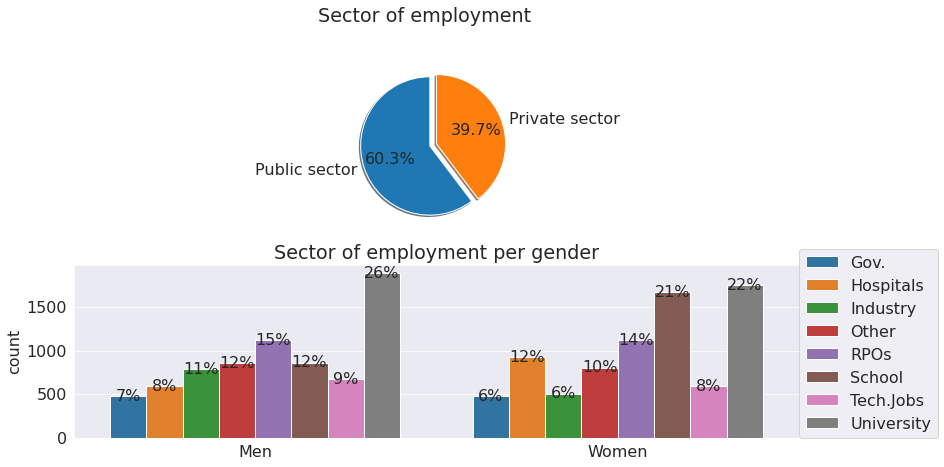

In [9]:
r=2
c=1
fig, axes = plt.subplots(r, c, figsize=(13,7))
fig.suptitle("Sector of employment")
axes[0].pie(x=df_phd.papriv.value_counts(), autopct = "%1.1f%%", labels=["Public sector", "Private sector"], shadow=True,  explode=[0.1,0], startangle=90);

df_phd_settlav = df_phd[df_phd.settlav != np.nan]
df_phd_settlav = df_phd_settlav.sort_values(["sesso", "settlav"])
settlav_freq = df_phd_settlav.groupby(["sesso", "settlav"]).size().reset_index().rename(columns={0: "count"})
settlav_freq["percentage"] = settlav_freq.groupby("sesso").apply(lambda x: x["count"]/x["count"].sum()).values
settlav_freq = settlav_freq.sort_values(["settlav", "sesso"])

sns.countplot(ax=axes[1], data=df_phd_settlav, x="sesso", hue="settlav", palette="tab10")

for i, bar in enumerate(axes[1].patches):
    axes[1].annotate(f"{settlav_freq.iloc[i,3] :.0%}", xycoords="data", 
                     xy=(bar.get_x()+0.5*bar.get_width(), bar.get_height()), ha="center", va="center")

axes[1].set_xlabel("")
axes[1].legend(title="", loc=(1,0))
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(["Men", "Women"])
axes[1].set_title("Sector of employment per gender");

- Circa tre dottori su cinque continuano a lavorare nel settore pubblico.
- Come avevamo già osservato meno del $30\%$ dei dottori è rimasto in ambito universitario; una parte significativa, soprattutto donne, è impiegata nell'istruzione preuniversitaria. Molti sono, comunque, ancora inseriti in enti di ricerca pubblici o privati.
- I dottori che sono impiegati in ambiti industriali sono soprattutto uomini, questo potrebbe essere dovuto anche al fatto che lo è anche la maggior parte dei dottori in discipline STEM.

Vogliamo verificare se vi è una differenza significativa fra i settori di occupazione nei due sessi. Applichiamo, quindi, il test del $\chi^2$ all'ipotesi nulla "il settore di occupazione è indipendente dal sesso". Se ciò fosse vero, ci aspetteremmo che ogni settore riproduca la ripartizione in sessi del campione, cioé gli occupati in ogni settore siano circa per il $52.9\%$ donne e per il $47.1\%$ uomini. Il numero di gradi di libertà è $(2-1)(7-1)=6$. Come livello di significatività prendiamo $\alpha=0.01$.

In [10]:
gdl = 6
freq = df_phd.sesso.value_counts().to_numpy()/len(df_phd)
F_theo = (df_phd.settlav.value_counts()*freq[0]).to_numpy()
M_theo = (df_phd.settlav.value_counts()*freq[1]).to_numpy()
F_obs = df_phd[df_phd.sesso == 2].settlav.value_counts().to_numpy()
M_obs = df_phd[df_phd.sesso == 1].settlav.value_counts().to_numpy()

chi2 = 0
for i in range(len(F_theo)):
    chi2 += (F_obs[i]-F_theo[i])**2/F_theo[i]
    chi2 += (M_obs[i]-M_theo[i])**2/M_theo[i]
chi2 /= gdl
print(f"\chi^2   =  " + str("{:.1f}".format(chi2)))
print("p-value  =  " + str(1-sp.chi2.cdf(x=chi2, df=gdl)))

\chi^2   =  39.0
p-value  =  7.178739855895344e-07


Il $p$-value è sensibilmente minore del livello di significatività, dunque rigettiamo l'ipotesi nulla: vi è una significativa differenza fra i settori di impiego dei dottori di ricerca nei due sessi.

Vediamo, ora, come il settore di impiego sia legato all'ambito in cui è stato svolto il dottorato.

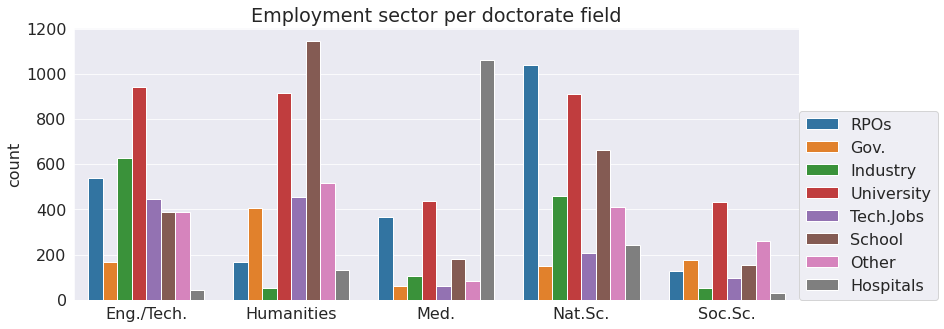

In [11]:
plt.subplots(figsize=(13,5))
sns.countplot(data=df_phd, x="settdott", hue="settlav", palette="tab10")
plt.legend(title="", loc=(1,0))
plt.xlabel("")
plt.title("Employment sector per doctorate field");

- Tendono a rimanere all'interno del settore pubblico soprattutto i dottori in discipline Umanistiche (che hanno la maggiore percentuale di lavoratori nella P.A. e nella scuola, anche se un gran numero resta nelle università), nelle Scienze Naturali (soprattutto scuola e università) e in campo Ingegneristico e Tecnologico (soprattutto in università, in questa categoria sono presenti anche i dottori in Matematica poiché sono raggruppati insieme a quelli in Informatica nel dataset).
- Molti dei dottori in Scienze Naturali che non trovano posto in università passano a organizzazioni che si occupano di ricerca (RPOs) sia pubbliche, sia private.
- La classificazione che abbiamo operato sui settori di impiego non riesce bene a discernere i lavori svolti dai dottori in scienze sociali (in cui sono inclusi quelli in Economia & Statistica), infatti la seconda voce più numerosa è ''Altro''. Il motivo può essere ricercato nel fatto che in tale voce sono incluse le occupazioni in ambito finanziario.
- Non è particolarmente soprendente che i dottori in Scienze Mediche siano per la maggior parte occupati negli ospedali o in enti di ricerca.

## Mobilità
Studiamo la mobilità lavorativa al momento dell'indagine in relazione all'ambito in cui hanno scelto di svolgere il loro percorso di ricerca.

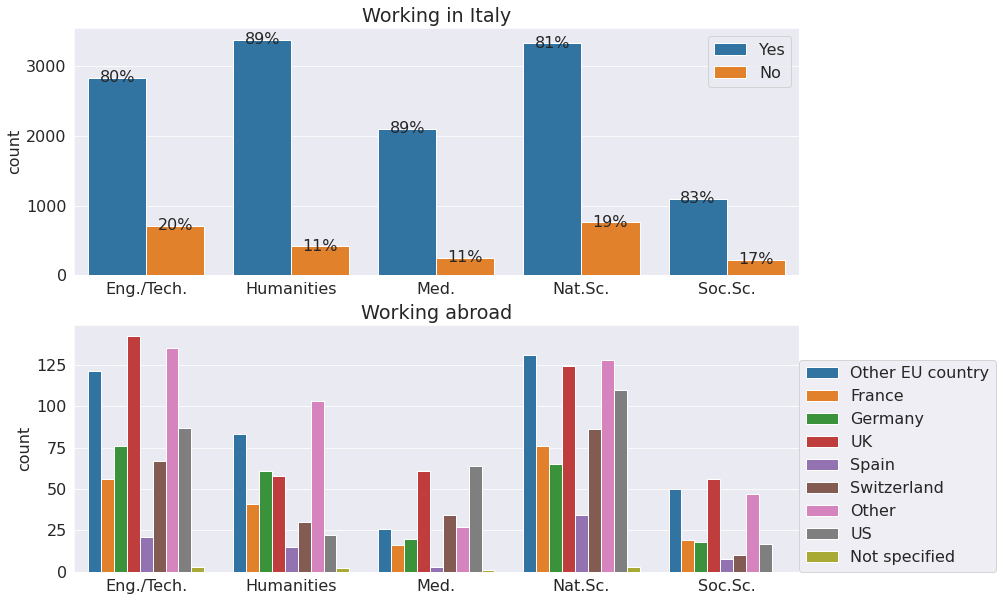

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))
df_phd.sort_values(by=["settdott"], inplace=True)
sns.countplot(ax=axes[0], data=df_phd, x="settdott", hue="itaest_l")

itaest_freq = df_phd.groupby(["settdott", "itaest_l"]).size().reset_index().rename(columns={0: "count"})
itaest_freq["percentage"] = itaest_freq.groupby("settdott").apply(lambda x: x["count"]/x["count"].sum()).values
itaest_freq.sort_values(["itaest_l", "settdott"], inplace=True)

for i, bar in enumerate(axes[0].patches):
    axes[0].annotate(f"{itaest_freq.iloc[i,3] :.0%}", xycoords="data", 
                     xy=(bar.get_x()+0.5*bar.get_width(), bar.get_height()), ha="center", va="center")

axes[0].set_title("Working in Italy")
axes[0].legend(title="", labels=["Yes", "No"])
axes[0].set_xlabel("")

sns.countplot(ax=axes[1], data=df_phd, x="settdott", hue="paeselav")
axes[1].set_title("Working abroad")
axes[1].set_xlabel("")
axes[1].legend(title="", labels=["Other EU country", "France", "Germany", "UK", "Spain", "Switzerland", 
                                 "Other", "US", "Not specified"],
              loc=(1,0));

- Almeno l'$80\%$ dei dottori ha scelto di restare in Italia dopo avere conseguito il titolo. La percentuale cresce dai dottori in discipline naturali o ingegneristico/tecnologiche fino a quelli di ambito umanistico.
- Fra i paesi di espatrio, ricorrono frequentamente quelli europei e il Regno Unito, anche se vi è un certo numero di intervistati, soprattutto nelle Scienze Naturali, Ignegneristico/Tecnologiche e Mediche, che si spostano negli Stati Uniti. Inoltre, il sondaggio non è stato in grado di intercettare con sufficiente precisione il paese di approdo di un gran numero di dottori che finisce nella categoria "Altro". Probabilmente, si tratta di persone che hanno trovato lavoro in paesi asiatici.

## Distribuzione dei redditi mensili netti lavoratori dipendenti
Studiamo la distribuzione dei redditi mensili per i lavoratori dipendenti (categoria più numerosa) distinti nei due sessi utilizzando una distribuzione di probabilità tipica per tale grandezza in campo economico: la distribuzione di Dagum definita dalla PDF:
$$
\mathcal{D}(x\,\lvert \,k,s,\lambda,x_0):=\dfrac{ks}{\lambda}\dfrac{1}{\bigl(\frac{x-x_0}{\lambda}\bigr)^{k+1}\bigl[1+\bigl(\frac{\lambda}{x-x_0}\bigr)^k\bigr]^{s+1}}\mathbf{1}_{(0,+\infty)}(x)
$$
per $k,s,\lambda,x_0>0$.

In [13]:
M_mincome = df_phd[(df_phd.sesso == 1) & (df_phd.tipo_lav_princ == 1)].redtot
F_mincome = df_phd[(df_phd.sesso == 2) & (df_phd.tipo_lav_princ == 1)].redtot
M_mincome = M_mincome.dropna()
F_mincome = F_mincome.dropna()
M_mincome = M_mincome.to_numpy()
F_mincome = F_mincome.to_numpy()
M_mincome = M_mincome[M_mincome < 6000]
F_mincome = F_mincome[F_mincome < 6000]

kM, sM, locM, scaleM = sp.burr.fit(M_mincome)
kF, sF, locF, scaleF = sp.burr.fit(F_mincome, floc=0)

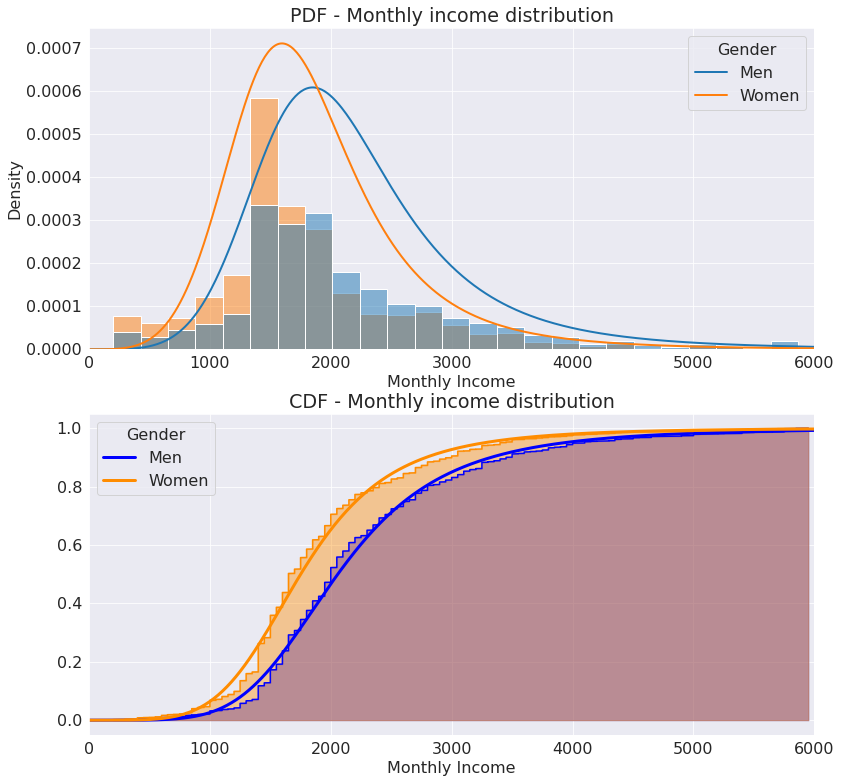

In [14]:
xmin = 0
xmax = 6000
x = np.linspace(xmin, xmax, 500)
Burr_M=sp.burr(c=kM, d=sM, loc=locM, scale=scaleM) 
Burr_F=sp.burr(c=kF, d=sF, loc=locF, scale=scaleF) 

fig, axes = plt.subplots(2, 1, figsize=(13,13))

axes[0].plot(x, Burr_M.pdf(x), linewidth=2)
axes[0].plot(x, Burr_F.pdf(x), linewidth=2)
sns.histplot(ax=axes[0], data=df_phd, x="redtot", hue="sesso", bins=30, stat="density", palette="tab10")
axes[0].set_xlim((xmin,xmax))
axes[0].set_xlabel("Monthly Income")
axes[0].set_title("PDF - Monthly income distribution")
axes[0].legend(title="Gender", labels = ["Men", "Women"])

c_M = np.sort(M_mincome)
c_F = np.sort(F_mincome)
idx_M = [ i/len(c_M) for i in range(len(c_M))]
idx_F = [ i/len(c_F) for i in range(len(c_F))]
axes[1].plot(x, Burr_M.cdf(x), linewidth=3, color="blue", label="Men")
axes[1].fill_between(c_M, idx_M, alpha=0.4, color="blue")
axes[1].plot(c_M, idx_M, color="blue")
axes[1].plot(x, Burr_F.cdf(x), linewidth=3, color="darkorange", label="Women")
axes[1].fill_between(c_F, idx_F, alpha=0.4, color="darkorange")
axes[1].plot(c_F, idx_F, color="darkorange")
axes[1].set_xlim((xmin,xmax))
axes[1].set_xlabel("Monthly Income")
axes[1].legend(title="Gender")
axes[1].set_title("CDF - Monthly income distribution");

Testiamo i fit mediante il test di Kolmogorov Smirnov:

In [15]:
sp.kstest(M_mincome, lambda x: sp.burr.cdf(x, c=kM, d=sM, loc=locM, scale=scaleM))

KstestResult(statistic=0.06352227419982603, pvalue=5.716089259910479e-16)

In [16]:
sp.kstest(F_mincome, lambda x: sp.burr.cdf(x, c=kF, d=sF, loc=locF, scale=scaleF))

KstestResult(statistic=0.09090400485119321, pvalue=5.943493354654946e-34)

- Prendendo un livello di significatività $\alpha=0.01$, l'ipotesi di redditi distribuiti seccondo la distribuzione di Dagum risulta da rigettare. Ciò potrebbe essere in parte dovuto ad un ''difetto'' nella modalità di indagine. Infatti, alla domanda sul reddito mensile era possibile rispondere in due modi: indicando l'importo esatto (domanda 2.32 del questionario) o indicando una fascia di reddito (domanda 2.33). Tali fasce prevedono una certa granularità da $400€$ a $4000€$ (campionato con passi da $200€$), mentre non vi è alcuna indicazione precisa al di fuori di esse (le voci sono ''meno di $300€$'' e ''più di $5000€$''). In ogni caso, ciò inficia la ''continuità'' della variabile reddito accumulando, ad esempio, tutti i redditi fra i $2200€$ e i $2300€$ agli estremi dell'intervallo. Per come sono forniti i dati non è possibile sapere se e quanti fra gli intervistati abbiano risposto fornendo una cifra precisa o indicando una fascia di reddito, ma è regionevole attendersi che per comodità o privacy abbiano preferito fornire indicazioni più "vaghe". 
- Si osservi, comunque, che la distribuzione dei redditi per le dottoresse compaiono con maggiore frequenza redditi leggermente più bassi. Per dare un'informazione qualitativa stimiamo il reddito medio e la varianza dei dati raccolti:

In [17]:
M_mincome = df_phd[(df_phd.sesso == 1) & (df_phd.tipo_lav_princ == 1)].redtot
F_mincome = df_phd[(df_phd.sesso == 2) & (df_phd.tipo_lav_princ == 1)].redtot
M_mincome = M_mincome.dropna()
F_mincome = F_mincome.dropna()
M_mincome = M_mincome.to_numpy()
F_mincome = F_mincome.to_numpy()
print("Average monthly income men        =  ( " + str("{:.0f}".format(M_mincome.mean())) + " +/- " + str("{:.0f}".format(M_mincome.std()/np.sqrt(len(M_mincome)-1))) + " ) €")
print("Average monthly income std men    =            " + str("{:.0f}".format(M_mincome.std())) + "   €")
print("Average monthly income women      =  ( " + str("{:.0f}".format(F_mincome.mean())) + " +/- " + str("{:.0f}".format(F_mincome.std()/np.sqrt(len(F_mincome)-1))) + " ) €")
print("Average monthly income std women  =            " + str("{:.0f}".format(F_mincome.std())) + "   €")

Average monthly income men        =  ( 2327 +/- 16 ) €
Average monthly income std men    =            1092   €
Average monthly income women      =  ( 1926 +/- 12 ) €
Average monthly income std women  =            854   €


Vediamo che, in media, i redditi delle dottoresse sono minori quasi di circa il $17\%$ rispetto a quelli degli uomini.

Questi dati riguardano il campione di dottori che hanno risposto all'intervista. Nello studio si è, però, cercato di condurre un'analisi di tipo globale raggruppando il campione in sottoinsiemi con caratteristiche simili (area disciplinare distintamente per sesso e conseguimento nei termini previsti del dottorato, ateneo) al fine di stimare dei pesi da assegnare a ciascun individuo sotto l'assunzione che l'appartenenza o meno ad un dato sottogruppo sia sufficiente a stimare i dati mancanti. Sono stati, così, ottenuti i pesi presenti nella colonna <code>coeff</code> del dataframe grazie ai quali possiamo ritenere di arrivare ad una buona stima delle quantità statistiche dell'intera popolazione. Per i redditi dei dipendenti otteniamo:

In [18]:
from statsmodels.stats.weightstats import DescrStatsW

df_phd_redd = pd.DataFrame(df_phd, columns=["sesso", "redtot", "coeff"])
df_phd_redd = df_phd_redd.dropna()
M_weight = DescrStatsW(df_phd_redd[df_phd_redd.sesso == 1].redtot, weights=df_phd_redd[df_phd_redd.sesso == 1].coeff, ddof=0)
F_weight = DescrStatsW(df_phd_redd[df_phd_redd.sesso == 2].redtot, weights=df_phd_redd[df_phd_redd.sesso == 2].coeff, ddof=0)

print("Average monthly income men     =  ( " + str("{:.0f}".format(M_weight.mean) )+ " +/- " + str("{:.0f}".format(M_weight.std_mean)) + " ) €")
print("Average monthly income women   =  ( " + str("{:.0f}".format(F_weight.mean)) + " +/- " + str("{:.0f}".format(F_weight.std_mean)) + " ) €")

Average monthly income men     =  ( 2234 +/- 13 ) €
Average monthly income women   =  ( 1812 +/- 9 ) €


Anche con questo approccio abbiamo due valori medi significativamente diversi. E' interessante che osservare che le due medie per i redditi maschili sono compatibili mentre la media stimata sull'intero campione dei redditi femminili risulta minore di più di $100€$ rispetto alla stima sulla popolazione che ha partecipato al sondaggio. 

## Conclusione 
- Mediamente, dal campione risulta che non vi è una grande discrepanza fra il numero di uomini e donne che scelgono di svolgere un dottorato in Italia, con una prevalenza femminile in ambiti umanistici, medici e biologici mentre i maschi rappresentano la maggior parte dei dottori in ambito Matematico/Informatico, delle Scienze Naturali e Ingegneristico.
- Dal punto di vista lavorativo, l'analisi svolta sembra indicare che svolgere un dottorato porti, indipendentemente dall'ambito, nella quasi totalità dei casi ad avere opportunità lavorative con una retribuzione media che risulta maggiore, per entrambi i sessi, alla media italiana per lavoratori dipendenti nell'anno 2018 (pari a circa $1636€$ netti al mese, fonte JP Salary Outlook 2019), anche se non di molto soprattutto per le donne. Esistono, naturalmente, delle differenze nel settore di impiego di dottori con diverse specializzazioni.
- Si osserva che il dottorato è in grado di garantire una occupazione nel mondo della ricerca universitaria solo a circa un $20\%$ degli studenti che ne prendono parte. I restanti sono costretti a virare su altre strade professionali. 
- La maggior parte comunque resta all'interno del settore pubblico in enti di ricerca o entra nell'insegnamento pre-universitario
- Pochi scelgono di espatriare dopo avere completato l'intero percorso di studi in Italia.
- Permane, come in ogni altro settore lavorativo, una differenza strutturale fra le retribuzioni e gli ambiti lavorativi fra i due sessi. Tale differenza si ritrova anche in una maggiore disoccupazione femminile rispetto a quella maschile, dovuta in circa un caso su cinque alla necessità di occuparsi della famiglia e/o dei figli.